# Basics tutorial

## Exercise 1

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


##### 1) Read in the covariance matrix, find its dimension, and convert it from a vector to a matrix.


In [4]:
covmat = np.loadtxt('SN_covmat.txt')

covmat = np.reshape(covmat, (31, -1))

print(covmat.shape)

(31, 31)


##### 2)  Plot the covariance matrix.


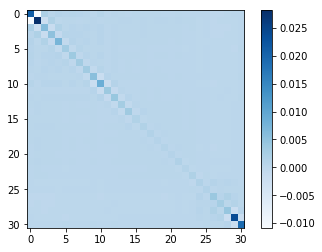

In [5]:
plt.imshow(covmat, cmap = 'Blues')
plt.colorbar()
plt.show()

##### 3) Compute and plot the correlation matrix.


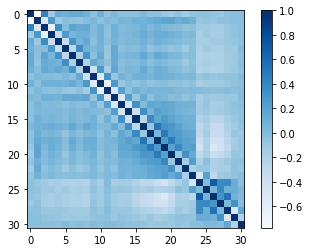

In [6]:
corrmat = np.corrcoef(covmat)

plt.imshow(corrmat, cmap = 'Blues')
plt.colorbar()
plt.show()

##### 4) Which two data points are the most correlated of them all? Which ones are the least correlated?


In [7]:
#mask the diagonal
masked_corrmat = np.copy(corrmat)
for i in range(masked_corrmat.shape[0]):
    masked_corrmat[i,i] = np.nan
    
maxcorr_loc = np.unravel_index(np.nanargmax(np.abs(masked_corrmat)), masked_corrmat.shape)
mincorr_loc = np.unravel_index(np.nanargmin(np.abs(masked_corrmat)), masked_corrmat.shape)

print('Maximum correlated: ', maxcorr_loc, '; value: ', masked_corrmat[maxcorr_loc])
print('Minimum correlated: ', mincorr_loc, '; value: ', masked_corrmat[mincorr_loc])

Maximum correlated:  (0, 1) ; value:  -0.7769915917059651
Minimum correlated:  (24, 25) ; value:  0.0004625308248552434


##### 5)  If you were forced to throw out 10 data points, but you wish to lose as little information as possible, which data points would you throw out?

You would want to successively throw out the 10 data points with the highest (absolute) correlation with any other data point

##### 6) Which data point has the largest error bar, as it would usually be plotted when showing a plot of the data and their error bars?


The data point with the largest covariance with itself (so the largest variance), which are the values on the diagonal of the covariance matrix.

##### 7) Compute the determinant of the covariance matrix. Think of the properties of the determinant in linear maps as they appear in linear algebra. Which meaning does the determinant of the covariance matrix have?

The determinant of the covariance matrix gives, in the case of Gaussian distributed data points, the differential or continuous entropy. This is the amount of information gained by adding a random variable, in the case of continuous probability distributions.


##### 8)  Invert the covariance matrix, and plot the inverse (which is often called ‘precision matrix’).


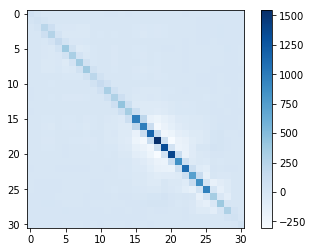

In [10]:
inv_covmat = np.linalg.inv(covmat)

plt.imshow(inv_covmat, cmap = 'Blues')
plt.colorbar()
plt.show()

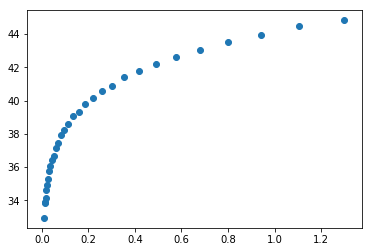

In [9]:
data = np.loadtxt('SN_datafile.txt')

plt.scatter(data[:,0], data[:,1])
plt.show()

## Exercise 2: Simple and/or interesting questions
1) What is the probability that a six-sided dice falls with the ‘5’ facing upwards?

$P = \frac{1}{6}$

2) What is the probability that a fair coin lands ‘heads’?

$P = \frac{1}{2}$

3) After having thrown a dice infinitely many times, what is the average score?

$E = \frac{1 + 2 + 3 + 4 + 5 + 6}{6} = 3\frac{1}{2}$

4) When rolling a dice 1000 times, what is the distribution of how often sixes were thrown?

A binomial distribution. **Actual answer**: this is correct, but you have to explain it. It is a process with two possible outcomes ("bi") and for each draw the results are independend from eachother.

5) If colour blindness is inherited via the X-chromosome, and a family of four has a colour-blind father, a colour-seeing mother, and a colour-blind son, what is the probability that the family’s daughter is colour-blind as well?

$P(\bar{X}X) = \frac{1}{2}$

6) Upon birth, the gender of a new-born is not always determined through genetics. Animal species exist which determine gender through other factors than genetics, e.g. breeding temperature. However, essentially all species where gender is genetically determined (i.e. via equivalents of the human X-and Y-chromosomes) have a gender ratio of 50:50. Why is that so? Would the species not breed faster if there were many more females than males?

During meiosis the cell from the male which will together with the egg from the female produce the offspring has a 50% chance of containing an X or Y equivalent chromosome. As the female will always produce an egg with an X equivalent chromosome, the gender is determined by the cell from the male. Thus the chance of the offspring being either male or female is 50%.

7) You play a game of hangman, meaning you have to guess a word, indicated e.g. as ‘__ __ __ ... __’. Which letter of the alphabet is the most informative?

The letter "e" occurs most often in the English alphabet [source](https://en.wikipedia.org/wiki/Letter_frequency). It will therefore be most likely to be present in the word and thus through its location in the word provide the strongest hints to the word itself. **Actual answer**: depends on what you think is important and what you want to sacrifice


## Exercise 3: Bargaining for funding

1) Imagine your data points are iid (identically independantly distributed), drawn from a Gaussian distribution of unknown mean but known variance. You wish to estimate the mean. How does the error of the mean decrease with the number of data points funded?

$\sigma_{mean} \propto \frac{1}{\sqrt{N}}$

with $N$ the number of data points funded.

2) Imagine your data points are again iid, but this time drawn from a Uniform distribution of unknown upper limit. You wish to estimate the upper bound. How does the error on the upper bound decrease with the number of data points funded?

Lets say that $Y = \max(X_1, \ldots, X_n)$ is our estimate of the upper bound and $a$ is the upper bound itself. The probability that all the $X_i$, and thus $Y$, is smaller than some parameter $y$ for $0 \leq y \leq a$ is $\left(\frac{y}{a}\right)^n$ 

This gives a density function $$f(y) = \frac{ny^{n-1}}{a^n}$$

The expectation value of $Y$ can then be calculated by evaluating the integral $$E(Y) = \int_{-\infty}^{\infty} f(y) y \mathrm{d} y = \frac{na}{n + 1}$$

For $E(Y^2) = \frac{na^2}{n+2}$

Because $\mathrm{Var}(Y) = E(Y^2) - (E(Y))^2$, $$\mathrm{Var}(Y) = \frac{na^2}{(n+1)^2 (n+2)}$$

[Source](https://math.stackexchange.com/questions/346112/computing-the-bias-and-standard-error-of-a-uniform-distribution-with-unknown-upp)

## Exercise 4: Background estimation: where would you measure next?

1) To which box would you add a data point?

The standard deviation on the average value measured (the constant $c$) is given by the standard deviation of the population divided by the number of data points:

$$\sigma_{\bar{c}} = \frac{\sigma}{n}$$


When adding a data point to the third box, its total error goes down from $\sigma_3 \approx 1.41 $ to $\sigma_3 = \frac{\sqrt{2}}{\sqrt{2}} = 1$ (-29%), while for box 1 and 2 this is $\sigma_1 \approx 0.71$ to $\sigma_1 = \frac{1}{\sqrt{3}} \approx 0.58$ (-18%) and $\sigma_2 \approx 1.41$ to $\sigma_2 = \frac{2}{\sqrt{3}} \approx 1.15$ (-18%) respectively. So for the third box the box error and thus the overall error decreases the most.

**True answer: add to first box as the variance there is lowest**

Total variance is given by:
$$\sigma_t^2 = \frac{1}{\sum_{i=1} \frac{1}{\sigma_i^2}}$$. So you want to add the smallest variances possible. Adding to box 1, 2 or 3 results in total variances of 0.22, 0.34 and 0.29 respectively.


2) What is the variance of your estimate of c?

When adding a data point to box 3 the number of data points per box is equal. As the data points and their noise are independent, we have $$\mathrm{Var}(c) = \frac{1}{n} \sum_i \sigma_i^2 = \frac{3*1^2 + 2*2^2 + 1*(\sqrt{2})^2}{6} = 2\frac{1}{6}$$


## Exercise 5: Being conservative: where would you measure now?

1) To learn most about the function, where do you measure next?

You measure in the last box where $x > 8$ as there are no data points there but there is a spline point. **This is correct**

2) Sketch possible shapes of the function.


## Exercise 6: Experimental design

1)  Design the optimal sequence in which to measure. Stop after 10 data points.

$$ = \{1, 3, 7, 5, 9, 8.5, 4.5, 6.5, 2.5, 0.5\}$$

First you want to measure in each box once with the lowest standard deviation possible, so start at lowest and end up at highest standard deviation. Then you want to lower the standard deviation per box, which is done most efficiently by starting at the box with the highest sigma and work your way down.

**Actual answer**:
The first 5 points are correct. But the last 5 points you have to decide on a case by case basis. If you think the function is constant, then you want to measure at the lowest variance. If the points are everywhere, then it might be a quickly varying function and you want to measure points close together.

## Exercise 7: The pdf of astronomical magnitudes

1)  If the number no of photons received (per time interval ∆t, with a detector of area A) follows the Gaussian distribution which distribution does the star's flux F have?

2) 


## Exercise 8: Absolute values of Gaussians

$$P(|x|) = P(x|x>0) + P(-x|x<0)$$

$$y = -x$$

$$P(y) = P(x) |\frac{\mathrm{d}y}{\mathrm{d}x}| = P(x)$$ 

Substitute $x \rightarrow -x$ in the second gaussian and add them together.


## Exercise 9: When tests fail teststests

##### 1. Kolmogorov-Smirnov test
- The test reacts to how equal two probability distributions (e.g. a parametric and an emperical one) are. It searches for the largest difference of the CDFs of the two distributions.
- It does not measure the shape of the functions, so you cannot determine which distribution it exactly is.
- A situation where the test fails is data which is roughly normally distributed compared to a normal distribution and a uniform distribution.

##### 2. Chi-squared over Degrees-of-Freedom test
- $$\chi^2 = \sum \frac{x_i - m_i}{\sigma^2_i}$$ where $x_i$ are the data points, $m_i$ the model data points and $\sigma_i$ the error of each data point. 
- The $\chi^2$ value itself does not say anything; it needs to be compared to values given by other models. You do not know how much the $\chi^2$ value varies, but it is a random variable as the data is a random variable.
- One of the assumptions is that the data points are normally distributed around the model. 
- When you have a complex model you do not know the exact number of independent degrees of freedom. Some of the parameters of your model might be inter-dependent. 